### Data loading
This book build on top of previous notebook basic_notebook: that served to load the data and get a understanding for it. In particular this notebook will focus on feature engineering. Note: this book will only consider data from the following csv files: train, test and structures


In [1]:
import pandas as pd

input_folder = './input'

train = pd.read_csv(f'{input_folder}/train.csv')
structures = pd.read_csv(f'{input_folder}/structures.csv')
sc_contributions = pd.read_csv(f'{input_folder}/scalar_coupling_contributions.csv')
mulliken_charges = pd.read_csv(f'{input_folder}/mulliken_charges.csv')
magnetic_shielding_tensors = pd.read_csv(f'{input_folder}/magnetic_shielding_tensors.csv')


In [2]:
f'Train shape: {train.shape}'

'Train shape: (4658147, 6)'

In [3]:
train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548


In [4]:
f'Structures shape: {structures.shape}'

'Structures shape: (2358657, 6)'

In [5]:
structures.head(3)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277


In [6]:
f'sc_contributions shape: {sc_contributions.shape}'

'sc_contributions shape: (4658147, 8)'

In [7]:
sc_contributions.head(3)

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.27201
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.43360
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.43387


In [8]:
f'mulliken_charges shape: {mulliken_charges.shape}'

'mulliken_charges shape: (1533537, 3)'

In [9]:
mulliken_charges.head(3)

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922


In [10]:
f'magnetic_shielding_tensors shape: {magnetic_shielding_tensors.shape}'

'magnetic_shielding_tensors shape: (1533537, 11)'

In [11]:
magnetic_shielding_tensors.head(3)

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967


#### Merging data sources into one training data set and one test data set 

Code for joining data is from this kernel: https://www.kaggle.com/seriousran/just-speed-up-calculate-distance-from-benchmark

In [12]:
def map_structures(df, atom_idx):
    df = pd.merge(df, structures, how = 'left',
                  left_on  = ['molecule_name', f'atom_index_{atom_idx}'],
                  right_on = ['molecule_name',  'atom_index'])
    
    df = df.drop('atom_index', axis=1)
    df = df.rename(columns={'atom': f'atom_{atom_idx}',
                            'x': f'x_{atom_idx}',
                            'y': f'y_{atom_idx}',
                            'z': f'z_{atom_idx}'})
    return df

In [13]:
train = map_structures(train, 0)
train = map_structures(train, 1)

In [14]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001


In [15]:
def map_sc_contributions(df):
    df = pd.merge(df, sc_contributions, how = 'left',
                  left_on  = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type'],
                  right_on = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type'])
    return df

In [16]:
train = map_sc_contributions(train)

In [17]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,fc,sd,pso,dso
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,83.0224,0.254579,1.25862,0.272010
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,-11.0347,0.352978,2.85839,-3.433600
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,-11.0325,0.352944,2.85852,-3.433870
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,-11.0319,0.352934,2.85855,-3.433930
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,83.0222,0.254585,1.25861,0.272013


In [18]:
def map_mulliken_charges(df, atom_idx):
    df = pd.merge(df, mulliken_charges, how = 'left',
                  left_on  = ['molecule_name', f'atom_index_{atom_idx}'],
                  right_on = ['molecule_name',  'atom_index'])
    
    df = df.drop('atom_index', axis=1)
    df = df.rename(columns={'mulliken_charge': f'mulliken_charge{atom_idx}'})
    return df

In [19]:
train = map_mulliken_charges(train, 0)
train = map_mulliken_charges(train, 1)

In [20]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,fc,sd,pso,dso,mulliken_charge0,mulliken_charge1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,83.0224,0.254579,1.25862,0.272010,0.133921,-0.535689
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,-11.0347,0.352978,2.85839,-3.433600,0.133921,0.133922
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,-11.0325,0.352944,2.85852,-3.433870,0.133921,0.133923
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,-11.0319,0.352934,2.85855,-3.433930,0.133921,0.133923
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,83.0222,0.254585,1.25861,0.272013,0.133922,-0.535689


In [21]:
def map_magnetic_shielding_tensors(df, atom_idx):
    df = pd.merge(df, magnetic_shielding_tensors, how = 'left',
                  left_on  = ['molecule_name', f'atom_index_{atom_idx}'],
                  right_on = ['molecule_name',  'atom_index'])
    
    df = df.drop('atom_index', axis=1)
    df = df.rename(columns={'XX': f'xx_{atom_idx}',
                            'YX': f'yx_{atom_idx}',
                            'ZX': f'zx_{atom_idx}',
                            'XY': f'xy_{atom_idx}',
                            'YY': f'yy_{atom_idx}',
                            'ZY': f'zy_{atom_idx}',
                            'XZ': f'xz_{atom_idx}',
                            'YZ': f'yz_{atom_idx}',
                            'ZZ': f'zz_{atom_idx}'})
    return df

In [22]:
train = map_magnetic_shielding_tensors(train, 0)
train = map_magnetic_shielding_tensors(train, 1)

In [23]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,...,zz_0,xx_1,yx_1,zx_1,xy_1,yy_1,zy_1,xz_1,yz_1,zz_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,...,34.0861,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,...,34.0861,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,...,34.0861,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,...,34.0861,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,...,33.8967,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170


In [24]:
train.shape

(4658147, 38)

### Feature engineering
#### Distances between atoms

In [25]:
def add_distances(df):
    df['dx']=df['x_1']-df['x_0']
    df['dy']=df['y_1']-df['y_0']
    df['dz']=df['z_1']-df['z_0']
    df['distance']=(df['dx']**2+df['dy']**2+df['dz']**2)**(1/2)
    return df

In [26]:
train_=add_distances(train)

In [27]:
train_type = pd.get_dummies(train_['type'])

In [28]:
train_new = pd.concat([train_, train_type], axis=1)
train_new.drop("type", axis=1, inplace=True)

In [29]:
train_new.head()

,id,molecule_name,atom_index_0,atom_index_1,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,...,dz,distance,1JHC,1JHN,2JHC,2JHH,2JHN,3JHC,3JHH,3JHN
0,0,dsgdb9nsd_000001,1,0,84.8076,H,0.002150,-0.006031,0.001976,C,...,0.006025,1.091953,1,0,0,0,0,0,0,0
1,1,dsgdb9nsd_000001,1,2,-11.2570,H,0.002150,-0.006031,0.001976,H,...,-0.001700,1.783120,0,0,0,1,0,0,0,0
2,2,dsgdb9nsd_000001,1,3,-11.2548,H,0.002150,-0.006031,0.001976,H,...,-0.878620,1.783147,0,0,0,1,0,0,0,0
3,3,dsgdb9nsd_000001,1,4,-11.2543,H,0.002150,-0.006031,0.001976,H,...,0.904421,1.783157,0,0,0,1,0,0,0,0
4,4,dsgdb9nsd_000001,2,0,84.8074,H,1.011731,1.463751,0.000277,C,...,0.007724,1.091952,1,0,0,0,0,0,0,0


#### Handling Category data

TODO: check this
For the above columns I will consider atom_index's ordinal data together with no_of_atomic_bond_distances. I will argue that atom's are pure labels, that is, nominal data.

LabelEncoder could be used for the ordinal data but as they are already ordered integers we will leave them be. One Hot Encoding is used for nominal data.

In [30]:
train_new['atom_0'] = train_new['atom_0'].astype("category").cat.codes
train_new['atom_1'] = train_new['atom_1'].astype("category").cat.codes
train_new['molecule_name'] = train_new['molecule_name'].astype("category").cat.codes

In [31]:
y = train_new["scalar_coupling_constant"]
train_new.drop("scalar_coupling_constant", axis=1, inplace=True)
X = train_new

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
del train
del structures
del sc_contributions
del mulliken_charges
del magnetic_shielding_tensors
del train_
del train_new

import gc
gc.collect()

20

In [48]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor(iterations=2000, depth= 13, random_seed = 23, task_type = "GPU", devices='0') # gpu_ram_part=0.95 | gpu_cat_features_storage=None | loss_function='RMSE' | custom_metric=None | eval_metric=None | grow_policy='SymmetricTree' | border_count=128 | random_strength = 1 

model_cat.fit(x_train, y_train)


0:	learn: 37.2448022	total: 116ms	remaining: 3m 51s
1:	learn: 36.1408404	total: 225ms	remaining: 3m 44s
2:	learn: 35.0708374	total: 337ms	remaining: 3m 44s
3:	learn: 34.0320061	total: 449ms	remaining: 3m 44s
4:	learn: 33.0247544	total: 558ms	remaining: 3m 42s
5:	learn: 32.0476333	total: 663ms	remaining: 3m 40s
6:	learn: 31.0999379	total: 771ms	remaining: 3m 39s
7:	learn: 30.1820595	total: 877ms	remaining: 3m 38s
8:	learn: 29.2924685	total: 982ms	remaining: 3m 37s
9:	learn: 28.4295675	total: 1.09s	remaining: 3m 37s
10:	learn: 27.5919938	total: 1.2s	remaining: 3m 36s
11:	learn: 26.7803386	total: 1.31s	remaining: 3m 36s
12:	learn: 25.9931084	total: 1.42s	remaining: 3m 36s
13:	learn: 25.2304128	total: 1.52s	remaining: 3m 35s
14:	learn: 24.4906896	total: 1.63s	remaining: 3m 35s
15:	learn: 23.7721147	total: 1.74s	remaining: 3m 35s
16:	learn: 23.0765541	total: 1.84s	remaining: 3m 34s
17:	learn: 22.4018644	total: 1.95s	remaining: 3m 34s
18:	learn: 21.7475332	total: 2.05s	remaining: 3m 33s
19:	

158:	learn: 2.8082730	total: 17.5s	remaining: 3m 22s
159:	learn: 2.8045759	total: 17.6s	remaining: 3m 22s
160:	learn: 2.7999013	total: 17.7s	remaining: 3m 21s
161:	learn: 2.7966400	total: 17.8s	remaining: 3m 21s
162:	learn: 2.7933061	total: 17.9s	remaining: 3m 21s
163:	learn: 2.7894238	total: 18s	remaining: 3m 21s
164:	learn: 2.7860472	total: 18.1s	remaining: 3m 21s
165:	learn: 2.7827190	total: 18.2s	remaining: 3m 21s
166:	learn: 2.7781797	total: 18.4s	remaining: 3m 21s
167:	learn: 2.7753013	total: 18.5s	remaining: 3m 21s
168:	learn: 2.7720274	total: 18.6s	remaining: 3m 21s
169:	learn: 2.7689842	total: 18.7s	remaining: 3m 21s
170:	learn: 2.7662753	total: 18.8s	remaining: 3m 21s
171:	learn: 2.7628927	total: 18.9s	remaining: 3m 21s
172:	learn: 2.7600038	total: 19.1s	remaining: 3m 21s
173:	learn: 2.7571985	total: 19.2s	remaining: 3m 21s
174:	learn: 2.7538734	total: 19.3s	remaining: 3m 21s
175:	learn: 2.7517161	total: 19.4s	remaining: 3m 20s
176:	learn: 2.7477834	total: 19.5s	remaining: 3m

314:	learn: 2.4859646	total: 35.1s	remaining: 3m 7s
315:	learn: 2.4846064	total: 35.2s	remaining: 3m 7s
316:	learn: 2.4829187	total: 35.4s	remaining: 3m 7s
317:	learn: 2.4816821	total: 35.5s	remaining: 3m 7s
318:	learn: 2.4805253	total: 35.6s	remaining: 3m 7s
319:	learn: 2.4795914	total: 35.7s	remaining: 3m 7s
320:	learn: 2.4785896	total: 35.8s	remaining: 3m 7s
321:	learn: 2.4769090	total: 35.9s	remaining: 3m 7s
322:	learn: 2.4757654	total: 36.1s	remaining: 3m 7s
323:	learn: 2.4743882	total: 36.2s	remaining: 3m 7s
324:	learn: 2.4723893	total: 36.3s	remaining: 3m 7s
325:	learn: 2.4705679	total: 36.4s	remaining: 3m 7s
326:	learn: 2.4692461	total: 36.6s	remaining: 3m 7s
327:	learn: 2.4682765	total: 36.7s	remaining: 3m 6s
328:	learn: 2.4673670	total: 36.8s	remaining: 3m 6s
329:	learn: 2.4661979	total: 36.9s	remaining: 3m 6s
330:	learn: 2.4646483	total: 37s	remaining: 3m 6s
331:	learn: 2.4633204	total: 37.2s	remaining: 3m 6s
332:	learn: 2.4620892	total: 37.3s	remaining: 3m 6s
333:	learn: 2.

472:	learn: 2.3221559	total: 53.6s	remaining: 2m 53s
473:	learn: 2.3216219	total: 53.7s	remaining: 2m 52s
474:	learn: 2.3208215	total: 53.8s	remaining: 2m 52s
475:	learn: 2.3200712	total: 54s	remaining: 2m 52s
476:	learn: 2.3191227	total: 54.1s	remaining: 2m 52s
477:	learn: 2.3180956	total: 54.2s	remaining: 2m 52s
478:	learn: 2.3172689	total: 54.3s	remaining: 2m 52s
479:	learn: 2.3164112	total: 54.5s	remaining: 2m 52s
480:	learn: 2.3159480	total: 54.6s	remaining: 2m 52s
481:	learn: 2.3150101	total: 54.7s	remaining: 2m 52s
482:	learn: 2.3141161	total: 54.8s	remaining: 2m 52s
483:	learn: 2.3128081	total: 54.9s	remaining: 2m 51s
484:	learn: 2.3120264	total: 55s	remaining: 2m 51s
485:	learn: 2.3111035	total: 55.1s	remaining: 2m 51s
486:	learn: 2.3101375	total: 55.3s	remaining: 2m 51s
487:	learn: 2.3095723	total: 55.4s	remaining: 2m 51s
488:	learn: 2.3084380	total: 55.5s	remaining: 2m 51s
489:	learn: 2.3073441	total: 55.6s	remaining: 2m 51s
490:	learn: 2.3060903	total: 55.8s	remaining: 2m 5

628:	learn: 2.2080148	total: 1m 12s	remaining: 2m 37s
629:	learn: 2.2074610	total: 1m 12s	remaining: 2m 37s
630:	learn: 2.2068197	total: 1m 12s	remaining: 2m 37s
631:	learn: 2.2061957	total: 1m 12s	remaining: 2m 37s
632:	learn: 2.2053057	total: 1m 12s	remaining: 2m 37s
633:	learn: 2.2046977	total: 1m 12s	remaining: 2m 36s
634:	learn: 2.2040772	total: 1m 12s	remaining: 2m 36s
635:	learn: 2.2035611	total: 1m 13s	remaining: 2m 36s
636:	learn: 2.2031949	total: 1m 13s	remaining: 2m 36s
637:	learn: 2.2025656	total: 1m 13s	remaining: 2m 36s
638:	learn: 2.2022055	total: 1m 13s	remaining: 2m 36s
639:	learn: 2.2017110	total: 1m 13s	remaining: 2m 36s
640:	learn: 2.2008929	total: 1m 13s	remaining: 2m 36s
641:	learn: 2.2002914	total: 1m 13s	remaining: 2m 35s
642:	learn: 2.1999046	total: 1m 13s	remaining: 2m 35s
643:	learn: 2.1994787	total: 1m 13s	remaining: 2m 35s
644:	learn: 2.1987958	total: 1m 14s	remaining: 2m 35s
645:	learn: 2.1983855	total: 1m 14s	remaining: 2m 35s
646:	learn: 2.1981133	total:

780:	learn: 2.1254802	total: 1m 30s	remaining: 2m 20s
781:	learn: 2.1250497	total: 1m 30s	remaining: 2m 20s
782:	learn: 2.1245861	total: 1m 30s	remaining: 2m 20s
783:	learn: 2.1240540	total: 1m 30s	remaining: 2m 20s
784:	learn: 2.1236717	total: 1m 30s	remaining: 2m 20s
785:	learn: 2.1231906	total: 1m 30s	remaining: 2m 20s
786:	learn: 2.1228019	total: 1m 30s	remaining: 2m 20s
787:	learn: 2.1224512	total: 1m 31s	remaining: 2m 19s
788:	learn: 2.1217768	total: 1m 31s	remaining: 2m 19s
789:	learn: 2.1213133	total: 1m 31s	remaining: 2m 19s
790:	learn: 2.1207882	total: 1m 31s	remaining: 2m 19s
791:	learn: 2.1202056	total: 1m 31s	remaining: 2m 19s
792:	learn: 2.1196910	total: 1m 31s	remaining: 2m 19s
793:	learn: 2.1193688	total: 1m 31s	remaining: 2m 19s
794:	learn: 2.1188687	total: 1m 31s	remaining: 2m 19s
795:	learn: 2.1185905	total: 1m 31s	remaining: 2m 19s
796:	learn: 2.1181951	total: 1m 32s	remaining: 2m 18s
797:	learn: 2.1175144	total: 1m 32s	remaining: 2m 18s
798:	learn: 2.1169766	total:

934:	learn: 2.0569467	total: 1m 48s	remaining: 2m 3s
935:	learn: 2.0564905	total: 1m 48s	remaining: 2m 3s
936:	learn: 2.0562674	total: 1m 48s	remaining: 2m 3s
937:	learn: 2.0556503	total: 1m 48s	remaining: 2m 3s
938:	learn: 2.0553530	total: 1m 49s	remaining: 2m 3s
939:	learn: 2.0547690	total: 1m 49s	remaining: 2m 3s
940:	learn: 2.0543009	total: 1m 49s	remaining: 2m 3s
941:	learn: 2.0539943	total: 1m 49s	remaining: 2m 2s
942:	learn: 2.0535488	total: 1m 49s	remaining: 2m 2s
943:	learn: 2.0531242	total: 1m 49s	remaining: 2m 2s
944:	learn: 2.0526432	total: 1m 49s	remaining: 2m 2s
945:	learn: 2.0521122	total: 1m 49s	remaining: 2m 2s
946:	learn: 2.0517822	total: 1m 50s	remaining: 2m 2s
947:	learn: 2.0513092	total: 1m 50s	remaining: 2m 2s
948:	learn: 2.0507228	total: 1m 50s	remaining: 2m 2s
949:	learn: 2.0504381	total: 1m 50s	remaining: 2m 2s
950:	learn: 2.0499016	total: 1m 50s	remaining: 2m 1s
951:	learn: 2.0494149	total: 1m 50s	remaining: 2m 1s
952:	learn: 2.0488561	total: 1m 50s	remaining:

1088:	learn: 1.9999843	total: 2m 7s	remaining: 1m 46s
1089:	learn: 1.9997229	total: 2m 7s	remaining: 1m 46s
1090:	learn: 1.9994509	total: 2m 7s	remaining: 1m 46s
1091:	learn: 1.9991273	total: 2m 7s	remaining: 1m 45s
1092:	learn: 1.9986708	total: 2m 7s	remaining: 1m 45s
1093:	learn: 1.9983146	total: 2m 7s	remaining: 1m 45s
1094:	learn: 1.9981142	total: 2m 7s	remaining: 1m 45s
1095:	learn: 1.9978579	total: 2m 7s	remaining: 1m 45s
1096:	learn: 1.9975981	total: 2m 7s	remaining: 1m 45s
1097:	learn: 1.9972492	total: 2m 8s	remaining: 1m 45s
1098:	learn: 1.9969074	total: 2m 8s	remaining: 1m 45s
1099:	learn: 1.9965145	total: 2m 8s	remaining: 1m 44s
1100:	learn: 1.9963086	total: 2m 8s	remaining: 1m 44s
1101:	learn: 1.9960444	total: 2m 8s	remaining: 1m 44s
1102:	learn: 1.9958353	total: 2m 8s	remaining: 1m 44s
1103:	learn: 1.9954631	total: 2m 8s	remaining: 1m 44s
1104:	learn: 1.9952555	total: 2m 8s	remaining: 1m 44s
1105:	learn: 1.9949378	total: 2m 9s	remaining: 1m 44s
1106:	learn: 1.9947104	total

1238:	learn: 1.9518822	total: 2m 24s	remaining: 1m 29s
1239:	learn: 1.9516438	total: 2m 25s	remaining: 1m 28s
1240:	learn: 1.9511528	total: 2m 25s	remaining: 1m 28s
1241:	learn: 1.9507411	total: 2m 25s	remaining: 1m 28s
1242:	learn: 1.9505826	total: 2m 25s	remaining: 1m 28s
1243:	learn: 1.9502753	total: 2m 25s	remaining: 1m 28s
1244:	learn: 1.9500389	total: 2m 25s	remaining: 1m 28s
1245:	learn: 1.9496397	total: 2m 25s	remaining: 1m 28s
1246:	learn: 1.9495065	total: 2m 25s	remaining: 1m 28s
1247:	learn: 1.9492408	total: 2m 25s	remaining: 1m 27s
1248:	learn: 1.9490044	total: 2m 26s	remaining: 1m 27s
1249:	learn: 1.9486643	total: 2m 26s	remaining: 1m 27s
1250:	learn: 1.9484088	total: 2m 26s	remaining: 1m 27s
1251:	learn: 1.9480902	total: 2m 26s	remaining: 1m 27s
1252:	learn: 1.9479082	total: 2m 26s	remaining: 1m 27s
1253:	learn: 1.9475675	total: 2m 26s	remaining: 1m 27s
1254:	learn: 1.9472619	total: 2m 26s	remaining: 1m 27s
1255:	learn: 1.9467608	total: 2m 26s	remaining: 1m 27s
1256:	lear

1388:	learn: 1.9084306	total: 2m 42s	remaining: 1m 11s
1389:	learn: 1.9081672	total: 2m 42s	remaining: 1m 11s
1390:	learn: 1.9076670	total: 2m 43s	remaining: 1m 11s
1391:	learn: 1.9073298	total: 2m 43s	remaining: 1m 11s
1392:	learn: 1.9071604	total: 2m 43s	remaining: 1m 11s
1393:	learn: 1.9070079	total: 2m 43s	remaining: 1m 11s
1394:	learn: 1.9067493	total: 2m 43s	remaining: 1m 10s
1395:	learn: 1.9065534	total: 2m 43s	remaining: 1m 10s
1396:	learn: 1.9061694	total: 2m 43s	remaining: 1m 10s
1397:	learn: 1.9058938	total: 2m 43s	remaining: 1m 10s
1398:	learn: 1.9057125	total: 2m 44s	remaining: 1m 10s
1399:	learn: 1.9054015	total: 2m 44s	remaining: 1m 10s
1400:	learn: 1.9052467	total: 2m 44s	remaining: 1m 10s
1401:	learn: 1.9050594	total: 2m 44s	remaining: 1m 10s
1402:	learn: 1.9048600	total: 2m 44s	remaining: 1m 9s
1403:	learn: 1.9044969	total: 2m 44s	remaining: 1m 9s
1404:	learn: 1.9042456	total: 2m 44s	remaining: 1m 9s
1405:	learn: 1.9039088	total: 2m 44s	remaining: 1m 9s
1406:	learn: 1

1542:	learn: 1.8677766	total: 3m 1s	remaining: 53.7s
1543:	learn: 1.8675725	total: 3m 1s	remaining: 53.6s
1544:	learn: 1.8673535	total: 3m 1s	remaining: 53.5s
1545:	learn: 1.8670620	total: 3m 1s	remaining: 53.4s
1546:	learn: 1.8668849	total: 3m 1s	remaining: 53.3s
1547:	learn: 1.8665699	total: 3m 1s	remaining: 53.1s
1548:	learn: 1.8663482	total: 3m 2s	remaining: 53s
1549:	learn: 1.8661094	total: 3m 2s	remaining: 52.9s
1550:	learn: 1.8658506	total: 3m 2s	remaining: 52.8s
1551:	learn: 1.8656925	total: 3m 2s	remaining: 52.7s
1552:	learn: 1.8654467	total: 3m 2s	remaining: 52.5s
1553:	learn: 1.8652351	total: 3m 2s	remaining: 52.4s
1554:	learn: 1.8649644	total: 3m 2s	remaining: 52.3s
1555:	learn: 1.8647577	total: 3m 2s	remaining: 52.2s
1556:	learn: 1.8644689	total: 3m 3s	remaining: 52.1s
1557:	learn: 1.8641667	total: 3m 3s	remaining: 52s
1558:	learn: 1.8639732	total: 3m 3s	remaining: 51.8s
1559:	learn: 1.8636799	total: 3m 3s	remaining: 51.7s
1560:	learn: 1.8635238	total: 3m 3s	remaining: 51.

1696:	learn: 1.8318939	total: 3m 19s	remaining: 35.7s
1697:	learn: 1.8316969	total: 3m 20s	remaining: 35.6s
1698:	learn: 1.8315832	total: 3m 20s	remaining: 35.5s
1699:	learn: 1.8313842	total: 3m 20s	remaining: 35.3s
1700:	learn: 1.8311143	total: 3m 20s	remaining: 35.2s
1701:	learn: 1.8308536	total: 3m 20s	remaining: 35.1s
1702:	learn: 1.8305426	total: 3m 20s	remaining: 35s
1703:	learn: 1.8302758	total: 3m 20s	remaining: 34.9s
1704:	learn: 1.8300738	total: 3m 20s	remaining: 34.8s
1705:	learn: 1.8297591	total: 3m 21s	remaining: 34.6s
1706:	learn: 1.8293523	total: 3m 21s	remaining: 34.5s
1707:	learn: 1.8290687	total: 3m 21s	remaining: 34.4s
1708:	learn: 1.8288225	total: 3m 21s	remaining: 34.3s
1709:	learn: 1.8286341	total: 3m 21s	remaining: 34.2s
1710:	learn: 1.8283145	total: 3m 21s	remaining: 34.1s
1711:	learn: 1.8281633	total: 3m 21s	remaining: 33.9s
1712:	learn: 1.8278886	total: 3m 21s	remaining: 33.8s
1713:	learn: 1.8277124	total: 3m 21s	remaining: 33.7s
1714:	learn: 1.8275060	total: 

1850:	learn: 1.7968579	total: 3m 38s	remaining: 17.6s
1851:	learn: 1.7966361	total: 3m 38s	remaining: 17.5s
1852:	learn: 1.7964281	total: 3m 39s	remaining: 17.4s
1853:	learn: 1.7961584	total: 3m 39s	remaining: 17.3s
1854:	learn: 1.7960207	total: 3m 39s	remaining: 17.1s
1855:	learn: 1.7957942	total: 3m 39s	remaining: 17s
1856:	learn: 1.7956877	total: 3m 39s	remaining: 16.9s
1857:	learn: 1.7954810	total: 3m 39s	remaining: 16.8s
1858:	learn: 1.7951780	total: 3m 39s	remaining: 16.7s
1859:	learn: 1.7948649	total: 3m 39s	remaining: 16.6s
1860:	learn: 1.7947094	total: 3m 40s	remaining: 16.4s
1861:	learn: 1.7945441	total: 3m 40s	remaining: 16.3s
1862:	learn: 1.7943674	total: 3m 40s	remaining: 16.2s
1863:	learn: 1.7940920	total: 3m 40s	remaining: 16.1s
1864:	learn: 1.7939056	total: 3m 40s	remaining: 16s
1865:	learn: 1.7937590	total: 3m 40s	remaining: 15.8s
1866:	learn: 1.7935658	total: 3m 40s	remaining: 15.7s
1867:	learn: 1.7933832	total: 3m 40s	remaining: 15.6s
1868:	learn: 1.7931829	total: 3m

In [49]:
y_pred_cat = model_cat.predict(x_test)

In [50]:
#  using train and structures: learn: 3.3137865 with iterations=2000, depth= 13, random_seed = 23, task_type = "GPU", devices='0'
#  using all files except potential + dipole_moments: OKAY learn: 0.3518528 with iterations=2000, depth= 13, random_seed = 23, task_type = "GPU", devices='0'
#  using all files except potential + dipole_moments + scalar_coupling_contributions: OKAY learn: 1.7676372 with iterations=2000, depth= 13, random_seed = 23, task_type = "GPU", devices='0'


from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

print("Variance_Score(cat_Regressor)\t:"+str(explained_variance_score(y_test,y_pred_cat)))
print("Mean_Absolute_Error(cat_Regressor)\t:"+str(mean_absolute_error(y_test,y_pred_cat)))
print("Mean_Squared_Error(cat_Regressor)\t:"+str(mean_squared_error(y_test,y_pred_cat)))
print("R2-Score(cat_Regressor)\t:"+str(r2_score(y_test,y_pred_cat)))

Variance_Score(cat_Regressor)	:0.9971516174077958
Mean_Absolute_Error(cat_Regressor)	:1.2471307470238873
Mean_Squared_Error(cat_Regressor)	:3.4842289299551834
R2-Score(cat_Regressor)	:0.997151617401891


####  using train and structures: learn: 3.3137865 with iterations=2000, depth= 13, random_seed = 23, task_type = "GPU", devices='0'

- Variance_Score(cat_Regressor)	:0.9899893942058969
- Mean_Absolute_Error(cat_Regressor)	:2.1324208651454906
- Mean_Squared_Error(cat_Regressor)	:12.245284353344122
- R2-Score(cat_Regressor)	:0.989989390604879

####  using all files except potential + dipole_moments: OKAY learn: 0.3518528 with iterations=2000, depth= 13, random_seed = 23, task_type = "GPU", devices='0'

- Variance_Score(cat_Regressor)	:0.9998529917559146
- Mean_Absolute_Error(cat_Regressor)	:0.17047136955047937
- Mean_Squared_Error(cat_Regressor)	:0.17982506714341875
- R2-Score(cat_Regressor)	:0.9998529916942164

#### #  using all files except potential + dipole_moments + scalar_coupling_contributions: OKAY learn: 1.7676372 with iterations=2000, depth= 13, random_seed = 23, task_type = "GPU", devices='0'

- Variance_Score(cat_Regressor)	:0.9971516174077958
- Mean_Absolute_Error(cat_Regressor)	:1.2471307470238873
- Mean_Squared_Error(cat_Regressor)	:3.4842289299551834
- R2-Score(cat_Regressor)	:0.997151617401891


#### What features are important

In [55]:
import matplotlib.pyplot as plt
    
def show_feature_importance(model, columns):
    fea_imp = pd.DataFrame({'col': columns, 'imp': model.feature_importances_})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-50:]
    fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
    plt.title('CatBoost - Feature Importance')
    plt.ylabel('Features')
    plt.xlabel('Importance')

In [58]:
x_train.columns

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'atom_0', 'x_0',
       'y_0', 'z_0', 'atom_1', 'x_1', 'y_1', 'z_1', 'mulliken_charge0',
       'mulliken_charge1', 'xx_0', 'yx_0', 'zx_0', 'xy_0', 'yy_0', 'zy_0',
       'xz_0', 'yz_0', 'zz_0', 'xx_1', 'yx_1', 'zx_1', 'xy_1', 'yy_1', 'zy_1',
       'xz_1', 'yz_1', 'zz_1', 'dx', 'dy', 'dz', 'distance', '1JHC', '1JHN',
       '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'],
      dtype='object')

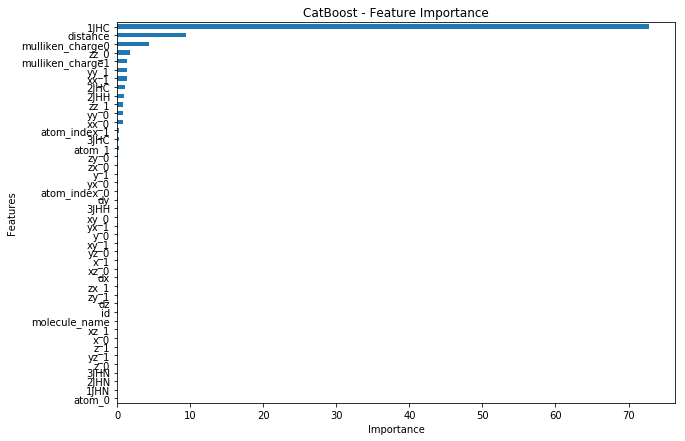

In [56]:
show_feature_importance(model_cat, x_train.columns)